# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.


### Objective
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business.


### Data Dictionary



*   order_id: Unique ID of the order
*   restaurant_name: Name of the restaurant
*   cuisine_type: Cuisine ordered by the customer
*   cost_of_the_order: Price paid per order
*   day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
*   rating: Rating given by the customer out of 5

*  food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
*  delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information




### Let us start by importing the required libraries

In [ ]:
# Write your code here to import necessary libraries for the project
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline
pd.set_option("display.float_format", lambda x: "%.2f" % x) #to display values upto 2 decimal places

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Write your code here to read the data
data = pd.read_csv("/content/drive/MyDrive/Python/Dataset/foodhub_order.csv")

In [ ]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
data.shape

(1898, 9)

#### Observations:
Number of rows = 1898
Number of column = 9

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
We observe that tere are 1 float datatype column, 4 integer datatype and 4 object datatype.  
All column have 1898 observation.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

No missing value in dataset


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.00,NaN,NaN,NaN,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,NaN,NaN,NaN,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.00,NaN,NaN,NaN,16.50,7.48,4.47,12.08,14.14,22.30,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.00,NaN,NaN,NaN,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,NaN,NaN,NaN,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:
The minimum time it takes for food to be prepared once an order is placed:- 20 min

The average time it takes for food to be prepared once an order is placed:- 27.37 min

The maximum time it takes for food to be prepared once an order is placed:- 35 min


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
data['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:

736 orders are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
data.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

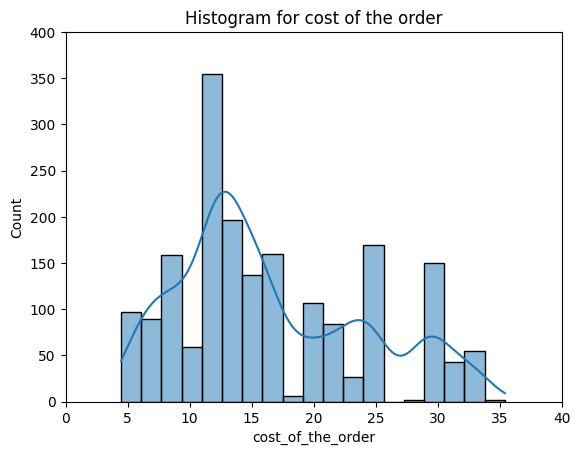

In [ ]:
# Write the code here
plt.title('Histogram for cost of the order')
plt.xlim(0,40)
plt.ylim(0,400)
sns.histplot(data = data, x="cost_of_the_order", kde=True);

### Oberservation
Most of the frequent cost range is between 10 and 15. This range has the highest count, peaking at 350 orders.

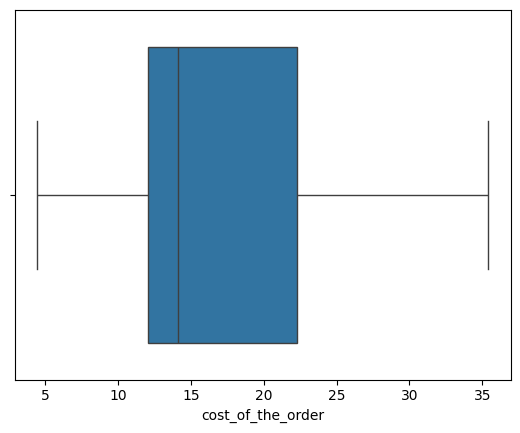

In [ ]:
sns.boxplot(data=data, x= "cost_of_the_order");

### Obeservation
For cost_of_the_order the cost per order is right skewed. This mean the coustomer are preferring the low cost order.

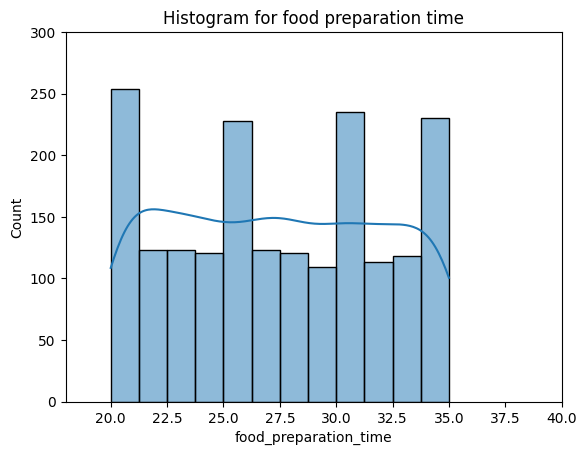

In [ ]:
plt.title('Histogram for food preparation time')
plt.xlim(18,40)
plt.ylim(0,300)
sns.histplot(data = data, x="food_preparation_time", kde=True);

### Observation

The food preparation times are approximately normally distributed, with a peak around 25-30 minutes.

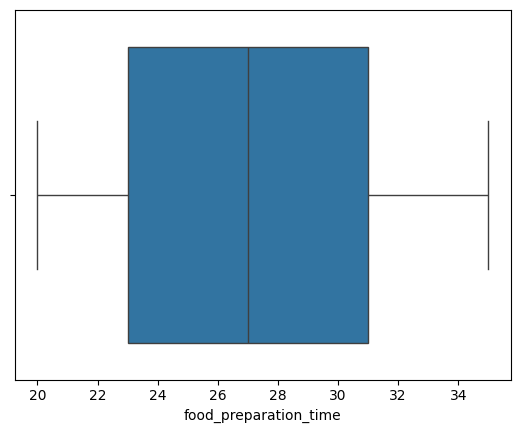

In [ ]:
sns.boxplot(data = data, x= "food_preparation_time");

The median preparation time is about 25 minutes, with a fairly symmetrical distribution. Ther are no outlier shown in the graph.

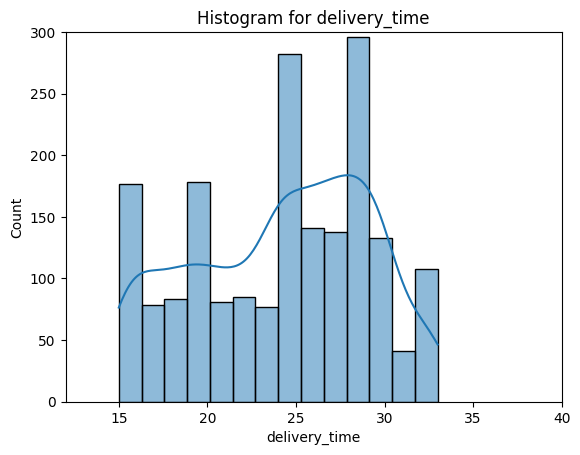

In [ ]:
plt.title('Histogram for delivery_time')
plt.xlim(12,40)
plt.ylim(0,300)
sns.histplot(data = data, x="delivery_time", kde=True);

### observation
The most frequent delivery time is in the range of 25-30, peaking at around 300 orders. This indicates that the majority of deliveries take place within this time frame.

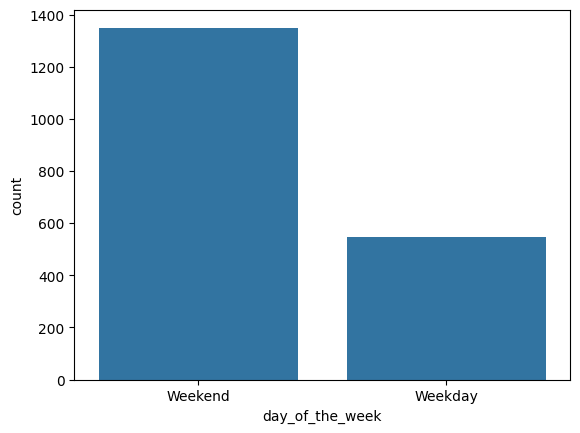

In [ ]:
sns.countplot(data=data, x='day_of_the_week');

There are more than double orders on weekends as compared to weekdays.Its indicate that the demand of food is higher during weekends.


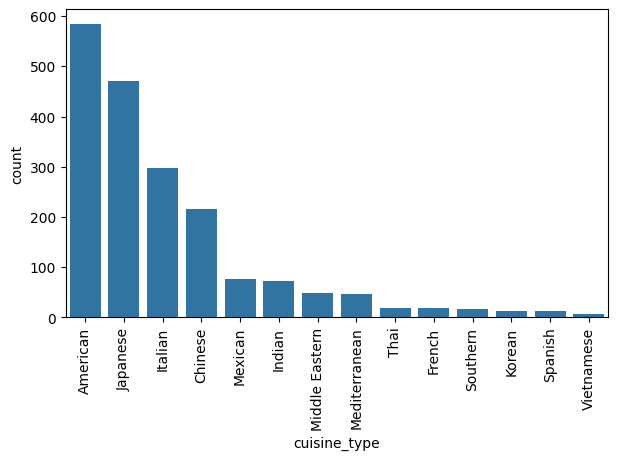

In [ ]:
# histpgram for the number of order, form highest to lowest for each cuisine type
plt.figure(figsize =(7,4))
sns.countplot(data =data, x= "cuisine_type", order=data["cuisine_type"].value_counts().index)
plt.xticks(rotation=90)
plt.show();

### Observation

There are total 14 unique cuisine.

Most order cuisine are American, Japanese and Italian.

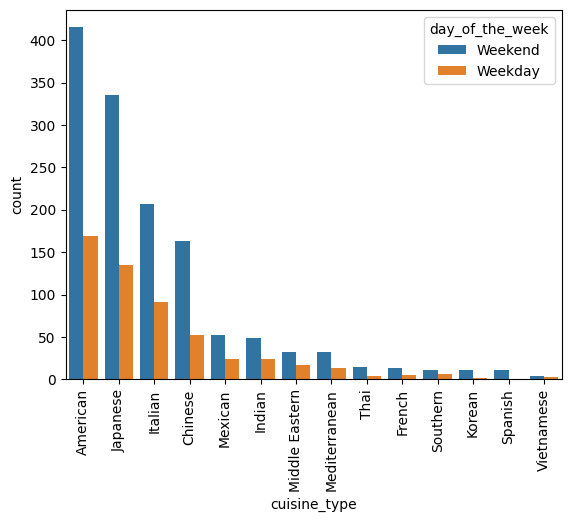

In [ ]:
sns.countplot(data=data, x= "cuisine_type", hue = "day_of_the_week",order=data["cuisine_type"].value_counts().index)
plt.xticks(rotation=90);

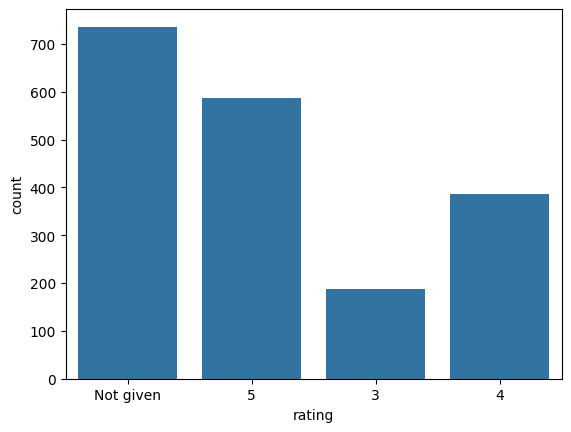

In [ ]:
sns.countplot(data=data, x= "rating");

### Observation

More than 700 coustmer didn't give the rating.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [41]:
# Write the code here
top_restaurant = data.restaurant_name.value_counts().head()

print(top_restaurant)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:

Top 5 restaurant name and number of order are:-

Shake Shack                  219

The Meatball Shop            132

Blue Ribbon Sushi            119

Blue Ribbon Fried Chicken     96

Parm                          68

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [59]:
# Write the code here
weekend_data = data[data.day_of_the_week == "Weekend"]
popular_cuisine = weekend_data.cuisine_type.value_counts().head()
print(popular_cuisine)

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: count, dtype: int64


#### Observations:

Top three cuisine type are:- american, Japanese and Italian

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [71]:
# Write the code here
data_more_then_20 = data[data.cost_of_the_order > 20]
percentage =  len(data_more_then_20.cost_of_the_order)/len(data.cost_of_the_order)*100
print('Percentage of the orders cost more than 20 dollars %.2f' % percentage)

Percentage of the orders cost more than 20 dollars 29.24


#### Observations:

29.24% of the orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [76]:
# Write the code here
mean_order_delivery = data.delivery_time.mean()
print(' %.2f' % mean_order_delivery)

 24.16


#### Observations:
The mean delivery time is 24.16 min

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [80]:
# Write the code here
data.customer_id.value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:
Top 3 most frequent customer Id are 52832, 47440, 83287.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


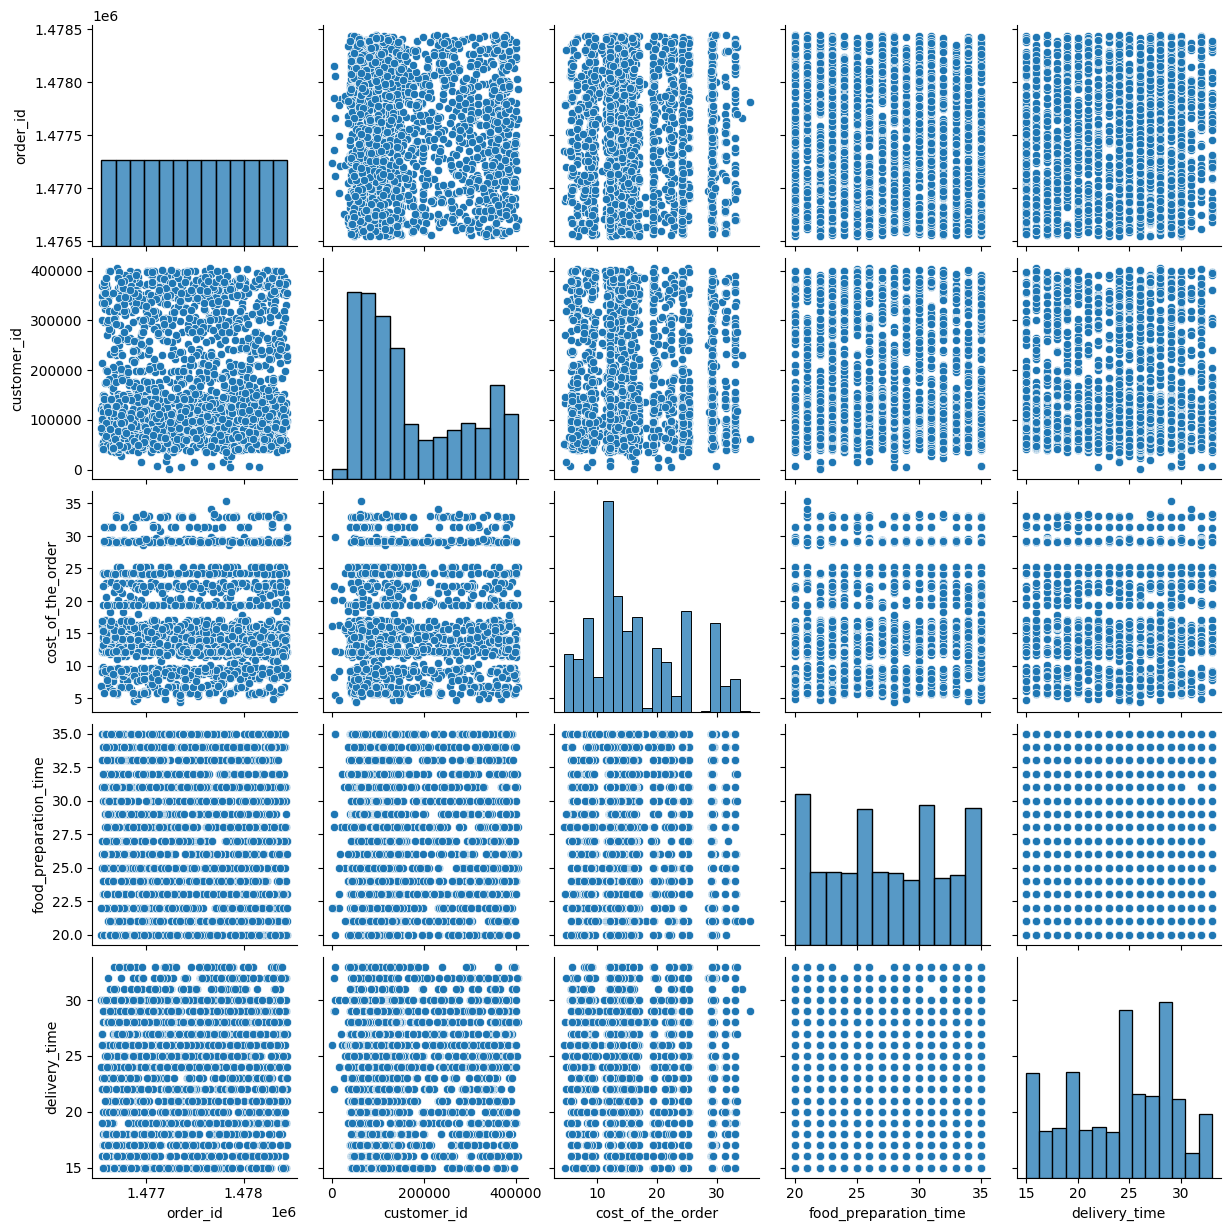

In [81]:
# Write the code here
sns.pairplot(data=data)
plt.show()

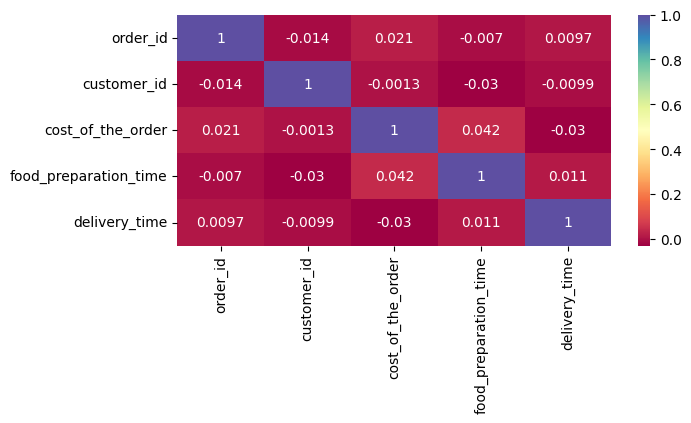

In [85]:
plt.figure(figsize=(7,3))
sns.heatmap(data = data[["order_id","customer_id","cost_of_the_order","food_preparation_time","delivery_time"]].corr(),annot=True,cmap='Spectral')
plt.show()

### Observation:
There is not a very strong coorelation between the datasets.

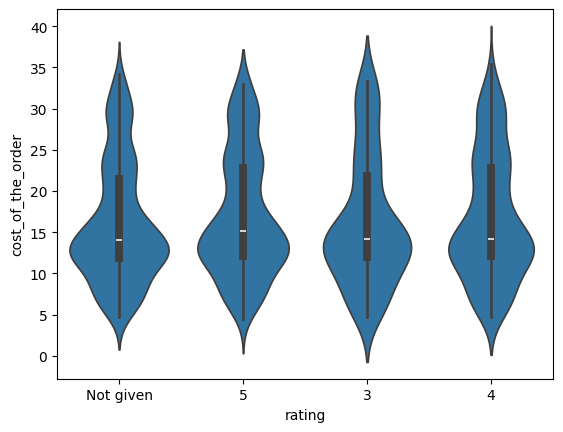

In [96]:
sns.violinplot(data= data, x= "rating", y="cost_of_the_order");

### Observation

Cost of food don't affect reating.

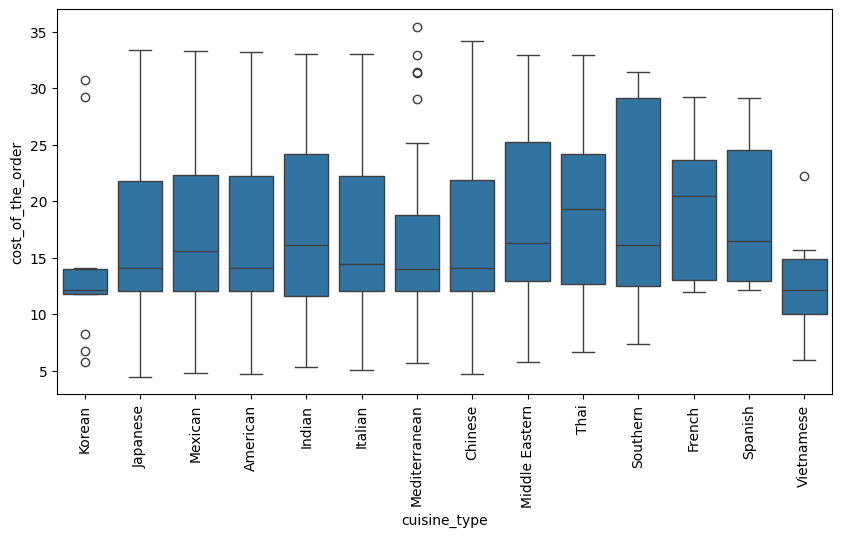

In [97]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='cuisine_type',y='cost_of_the_order')
plt.xticks(rotation=90);

### Observation:
*   We can see most of the orders for different cuisine type are around the cost of the order between 10-20 dollars
*   There are also few outlies with respect to cost of the order from cuisne types like Korean, Mediterranean and Vietnamese



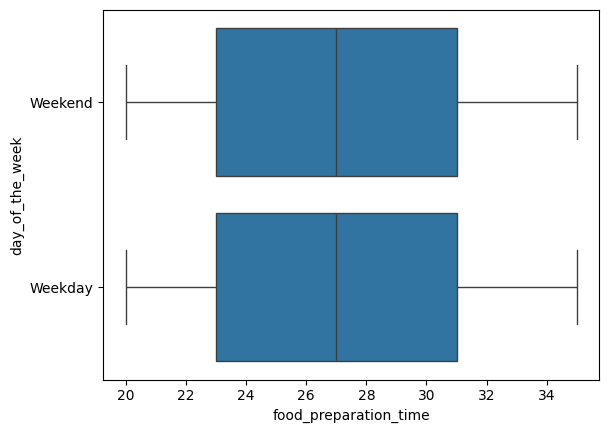

In [100]:
sns.boxplot(data= data, x= "food_preparation_time", y="day_of_the_week");

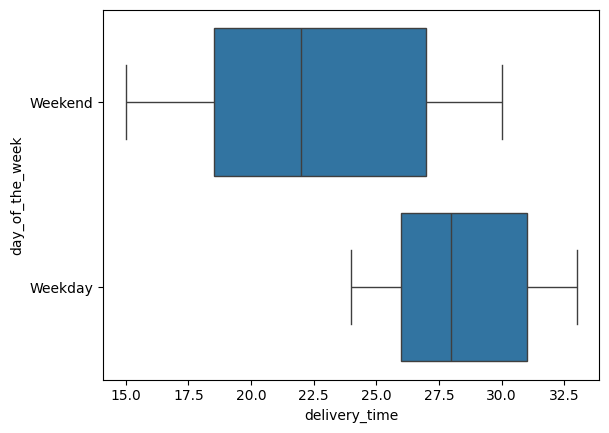

In [101]:
sns.boxplot(data= data, x= "delivery_time", y="day_of_the_week");

### Observation
*   Food preparation time does not affect due to weekend
*   Delivery time is longer during the week days as compare to weekends



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [102]:
# Write the code here

data['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [116]:
# rating is in object type need to convert into int
# replacing 'Not given' by nan
data['rating']=data['rating'].replace(['Not given'],np.nan)

# converting datatype into integer
data['rating'] = data["rating"].astype(float)

data_mean_count = data.groupby(['restaurant_name'])['rating'].agg(['mean','count'])
data_mean_count.head()

restaurent_fulfilling_criteria =data_mean_count[(data_mean_count['mean']>4) & (data_mean_count['count'] >50)]
restaurent_fulfilling_criteria

,mean,count
restaurant_name,,
Blue Ribbon Fried Chicken,4.33,64
Blue Ribbon Sushi,4.22,73
Shake Shack,4.28,133
The Meatball Shop,4.51,84


#### Observations:

The restaurants fulfilling the criteria to get the promotional offer are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [127]:
# Write the code here
data['revenue'] = np.where(data['cost_of_the_order'] > 20,
                           data['cost_of_the_order'] * 0.25,
                           np.where(data['cost_of_the_order'] > 5,
                                    data['cost_of_the_order'] * 0.15, 0))

data.revenue.sum()

6166.303

#### Observations:
Revene generated by the company across all orders is 6166.303$


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [128]:
# Write the code here
# first calculate the total delivering time
data["total_time"] = data["food_preparation_time"]+data["delivery_time"]

data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,7.69,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1.81,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.00,23,28,1.83,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.00,25,15,7.30,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.00,25,24,1.74,49


In [133]:
more_then_60min = data[data["total_time"]>60]
percentage_more_then_60min = more_then_60min.total_time.count()/data.total_time.count()*100
print("Percentage of orders take more than 60 minutes to get delivered from the time the order is placed %.2f" % percentage_more_then_60min)

Percentage of orders take more than 60 minutes to get delivered from the time the order is placed 10.54


#### Observations:
Percentage of orders take more than 60 minutes to get delivered from the time the order is placed 10.54

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

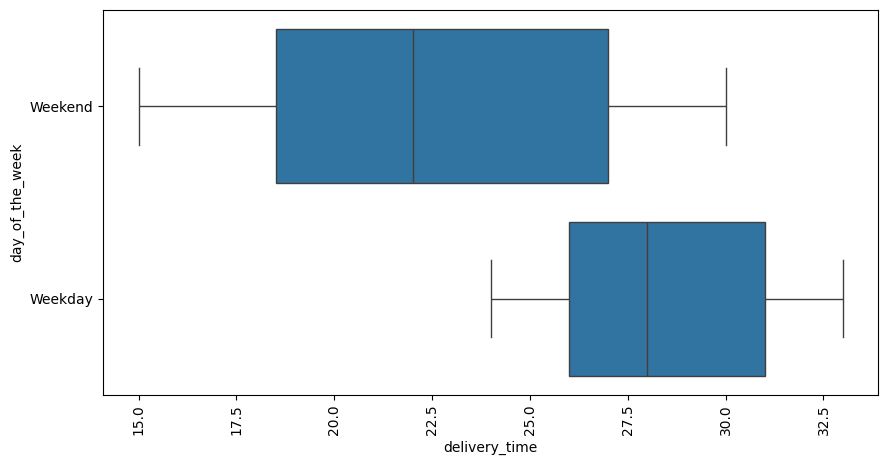

In [137]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='delivery_time',y='day_of_the_week')
plt.xticks(rotation=90);

day_of_the_week
Weekday   28.34
Weekend   22.47
Name: delivery_time, dtype: float64


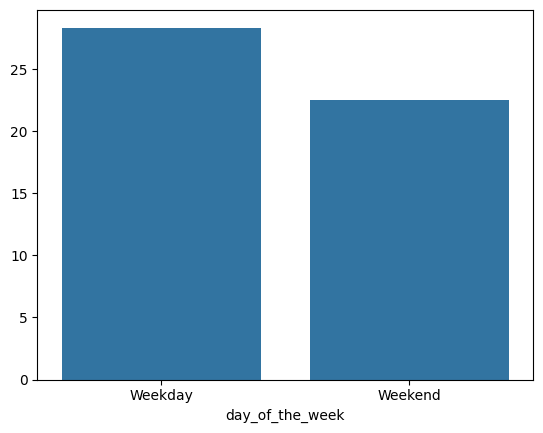

In [135]:
# Write the code here
mean_delivery = data.groupby(['day_of_the_week'])['delivery_time'].mean()
sns.barplot(x=mean_delivery.index, y=mean_delivery.values);
print(mean_delivery)

#### Observations:
In  the boxplot we can observed that dilivery time is longer during the week days as compair to weekends.

Weekend deliveries often occur approximately six minutes earlier than weekday deliveries, as indicated by the mean delivery time difference of roughly six minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*   Most of the cost of order range is between 10 and 20.
*   Most order cuisine are American, Japanese, Italian and Chinese
*   29.24 % of the orders cost more than 20 dollars.
*   Delivery time is longer during the week days as compare to weekends
*   10% of all orders take over 60 minutes to arrive at customers location.
*   Revene generated by the company across all orders is 6166.303$












### Recommendations:

*  10% of customer getting their order after 60min. Need to improve delivery timing.
*   Company can add more restaurants with coisine type is American, Japanese, Italian and Chinese
*   Company can work on the delivery time weekday.

